# Data Science for Geoscience

Let's use some standard Machine Learning tools available in Python packages to analyse some data.

We have a dataset (from Butterworth et al 2016) with a collection of tectonomagmatic parameters associated with the time and location of porphyry copper deposits. We want to determine which of these (if any) parameters are geologically important (or at least statistically significant) in relation to the formation of porphyry coppers.

Run the next cell to see an animation representing this data


![SegmentLocal](../data/MullerConvergenceSmall.gif "segment")

### Now, import most of the modules we need
By convention module loads go at the top of your workflows.

In [1]:
import pandas #For dealing with data structures
import numpy as np #Data array manipulation
import scipy #Scientific Python, has lots of useful tools
import scipy.io #A specific sub-module for input/output of sci data

#scikit-learn tools to perform machine learning classification
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

#For making pretty figures
import matplotlib.pyplot as plt 

#For easy geographic projections on a map
import cartopy.crs as ccrs

#Import a set of tools we have made ourselves
from utils import *

Imported shapefile.
Imported matplotlib.


### Now load in the data

In [3]:
#Use pandas to load in the machine learning dataset
ml_data=pandas.read_csv("../data/ml_data_points.csv",index_col=0)

In [4]:
#Print out the dataset so we can see what it looks like
ml_data

,0 Present day longitude (degrees),1 Present day latitude (degrees),2 Reconstructed longitude (degrees),3 Reconstructed latitude (degrees),4 Age (Ma),5 Time before mineralisation (Myr),6 Seafloor age (Myr),7 Segment length (km),8 Slab length (km),9 Distance to trench edge (km),...,11 Subducting plate parallel velocity (km/Myr),12 Overriding plate normal velocity (km/Myr),13 Overriding plate parallel velocity (km/Myr),14 Convergence normal rate (km/Myr),15 Convergence parallel rate (km/Myr),16 Subduction polarity (degrees),17 Subduction obliquity (degrees),18 Distance along margin (km),19 Subduction obliquity signed (radians),20 Ore Deposits Binary Flag (1 or 0)
0,-66.28,-27.37,-65.264812,-28.103781,6.0,0.0,48.189707,56.08069,2436.30907,2436.30907,...,40.63020,-17.43987,12.20271,102.31471,28.82518,5.67505,15.73415,2269.19769,0.274613,1.0
1,-69.75,-30.50,-67.696759,-31.970639,12.0,0.0,52.321162,56.09672,2490.68735,2490.68735,...,39.60199,-22.80622,13.40127,115.35820,27.39401,5.78937,13.35854,1823.34107,0.233151,1.0
2,-66.65,-27.27,-65.128689,-28.374772,9.0,0.0,53.506085,55.77705,2823.54951,2823.54951,...,45.32425,-18.08485,11.27500,100.24282,34.62444,8.97218,19.05520,2269.19769,0.332576,1.0
3,-66.61,-27.33,-65.257928,-28.311094,8.0,0.0,51.317135,55.90088,2656.71724,2656.71724,...,43.13319,-17.78538,11.72618,101.21965,31.92962,7.42992,17.50782,2269.19769,0.305569,1.0
4,-66.55,-27.40,-65.366917,-28.257580,7.0,0.0,49.340097,56.09011,2547.29585,2547.29585,...,40.57322,-17.43622,12.23778,102.25748,28.80235,5.65657,15.73067,2269.19769,0.274552,1.0
5,-66.57,-27.28,-65.217784,-28.260958,8.0,0.0,51.466451,55.90088,2656.71724,2656.71724,...,43.13319,-17.78538,11.72618,101.21965,31.92962,7.42992,17.50782,2269.19769,0.305569,1.0
6,-67.90,-26.30,-65.391160,-28.036212,14.0,0.0,59.705229,56.14614,2937.75395,2937.75395,...,39.41149,-23.26852,13.45193,116.11452,27.28535,5.46709,13.22382,2325.21126,0.230799,1.0
7,-70.58,-38.25,-44.673534,-42.077290,85.0,0.0,12.269256,55.39199,2151.81813,2151.81813,...,54.37230,-64.95285,1.30871,78.24529,41.27280,15.23262,27.81074,1051.14453,0.485389,1.0
8,-70.05,-31.95,-67.762375,-33.560754,13.0,0.0,52.536887,56.09528,2322.50643,2322.50643,...,39.04452,-22.55457,13.52329,115.01528,26.79653,5.64144,13.11495,1655.41651,0.228899,1.0
9,-66.60,-24.13,-64.317484,-25.721047,13.0,0.0,60.362977,56.15019,3218.30664,3218.30664,...,40.05359,-23.55670,13.30724,116.18280,27.99456,5.64018,13.54734,2549.28917,0.236446,1.0


There are 21 columns (python (usually) counts from 0) representing different parameters. Some of these parameters may be useful for us. Some are not. The final column contains a binary flag representing whether there is a known porphyry copper deposit at that location or not. The "non-deposits" are required to train our Machine Learning classifier what a porphyry deposit looks like, and also, what a porphyry deposit doesn't look like!

### Now let's perform our machine learning binary classification.

In [68]:
#Change data format to numpy array for easy manipulation
ml_data_np=ml_data.values

#Set the indices of the parameters (features) to include in the ML
params=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# Alternatively try any 4 features you'd like to include!
#params=[6,9,14,17] 


#Save the number of parameters we have chosen
datalength=len(params)

#Normalise the data for Machine Learning
ml_data_norm=preprocessing.scale(ml_data_np[:,params])

#Create a 'feature vector' and a 'target classification vector'
features=ml_data_norm
targets=ml_data_np[:,20]

#Print out some info about our final dataset
print("Shape of ML data array: ", ml_data_norm.shape)
print("Positive (deposits) examples: ",np.shape(ml_data_np[ml_data_np[:,20]==1,:]))
print("Negative (non-deposits) examples: ",np.shape(ml_data_np[ml_data_np[:,20]==0,:]))

Shape of ML data array:  (301, 21)
Positive (deposits) examples:  (147, 21)
Negative (non-deposits) examples:  (154, 21)


In [69]:
print('Make the classifiers')

print('Random Forest...')
#create and train the random forest
#multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
#n_estimators use between 64-128 doi: 10.1007/978-3-642-31537-4_13
rf = RandomForestClassifier(n_estimators=128, n_jobs=1,class_weight=None)
rf.fit(features,targets)
print("Done RF")

scores = cross_val_score(rf, features,targets, cv=10)
print("RF Scores: ",scores)
print("SCORE Mean: %.2f" % np.mean(scores), "STD: %.2f" % np.std(scores), "\n")

print("Targets (expected result):")
print(targets)

print("Prediction (actual result):")
print(rf.predict(features))

Make the classifiers
Random Forest...
Done RF
RF Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
SCORE Mean: 1.00 STD: 0.00 

Targets (expected result):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Importance 	 Feature
0.016 		 0 Present day longitude (degrees)
0.010 		 1 Present day latitude (degrees)
0.054 		 2 Reconstructed longitude (degrees)
0.017 		 3 Reconstructed latitude (degrees)
0.048 		 4 Age (Ma)
0.000 		 5 Time before mineralisation (Myr)
0.040 		 6 Seafloor age (Myr)
0.021 		 7 Segment length (km)
0.027 		 8 Slab length (km)
0.030 		 9 Distance to trench edge (km)
0.022 		 10 Subducting plate normal velocity (km/Myr)
0.019 		 11 Subducting plate parallel velocity (km/Myr)
0.022 		 12 Overriding plate normal velocity (km/Myr)
0.015 		 13 Overriding plate parallel velocity (km/Myr)
0.016 		 14 Convergence normal rate (km/Myr)
0.017 		 15 Convergence parallel rate (km/Myr)
0.016 		 16 Subduction polarity (degrees)
0.030 		 17 Subduction obliquity (degrees)
0.008 		 18 Distance along margin (km)
0.014 		 19 Subduction obliquity signed (radians)
0.561 		 20 Ore Deposits Binary Flag (1 or 0)


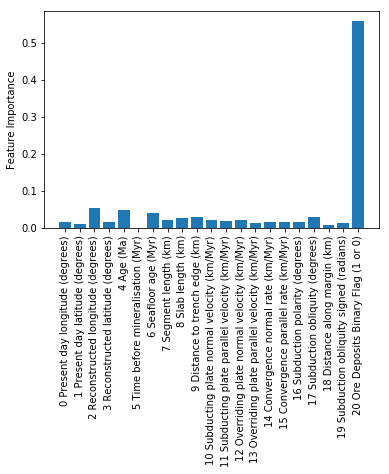

In [70]:
#Make a list of labels for our chosen features
paramColumns=np.array(ml_data.columns)
paramLabels=paramColumns[params].tolist()

#Create a new figure
fig, ax = plt.subplots()

#Plot the bar graph
rects=ax.bar(np.arange(0, datalength, step=1),rf.feature_importances_)

#Label the axes
ax.set_xticks(np.arange(0, datalength, step=1))
ax.set_xticklabels(paramLabels,rotation=90)
ax.set_ylabel('Feature Importance')

#Print the feature importance to compare with plot
np.set_printoptions(precision=3,suppress=True)
print("Importance \t Feature")
for i,label in enumerate(paramLabels):
    print("%1.3f \t\t %s" % (rf.feature_importances_[i],label))

plt.show()


Now if we can measure the tectonomagmatic properties at some point. Based on our trained classifer we can predict a probability that porphyry copper deposits have formed

In [71]:
#Apply the trained ML to our gridded data to determine the probabilities at each of the points
print('RF...')
pRF=np.array(rf.predict_proba(features))
print("Done RF")

RF...
Done RF


## Maps!

In [72]:
filename="../data/EarthByte_Zahirovic_etal_2016_ESR_r888_AgeGrid-0.nc"
data = scipy.io.netcdf.netcdf_file(filename,'r')
data.variables

OrderedDict([('lon', <scipy.io.netcdf.netcdf_variable at 0x20e97329828>),
             ('lat', <scipy.io.netcdf.netcdf_variable at 0x20e97329e80>),
             ('z', <scipy.io.netcdf.netcdf_variable at 0x20e97329cc0>)])

In [73]:
varX=data.variables['lon'][:]
varY=data.variables['lat'][:]
varZ=np.array(data.variables['z'][:])
data.close()

C:\Users\nbutter\Anaconda3\envs\test\lib\site-packages\scipy\io\netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


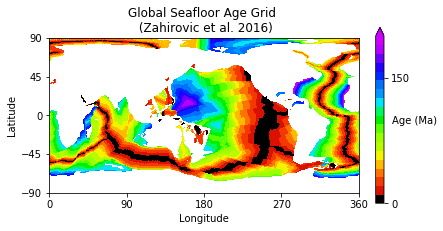

In [74]:
#Make a figure object
plt.figure()

#Get the axes of the current figure, for manipulation
ax = plt.gca()

#Create a colormap from a predefined function
age_cmap=colormap_age()

#Put down the main dataset
im=ax.imshow(varZ,vmin=0,vmax=200,extent=[0,360,-90,90],origin='lower',aspect=1,cmap=age_cmap)

#Make a colorbar
cbar=plt.colorbar(im,fraction=0.025,pad=0.05,ticks=[0, 150],extend='max')
cbar.set_label('Age (Ma)', rotation=0)

#Clean up the default axis ticks
plt.yticks([-90,-45,0,45,90])
plt.xticks([0,90,180,270,360])

#Put labels on the figure
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#Put a title on it
plt.title("Global Seafloor Age Grid \n (Zahirovic et al. 2016)")

plt.show()

### For loops plotting shapefiles

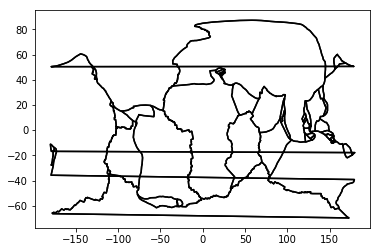

In [75]:
#Load in plate polygons for plotting
topologyFile='../data/topology_platepolygons_0.00Ma.shp'
[recs,shapes,fields,Nshp]=readTopologyPlatepolygonFile(topologyFile)
for i, nshp in enumerate(range(Nshp)):
    #if nshp!=35 and nshp!=36 and nshp!=23:
    #These are the plates that cross the dateline and cause 
        #banding errors
        polygonShape=shapes[nshp].points
        poly=np.array(polygonShape)
        plt.plot(poly[:,0], poly[:,1], c='k',zorder=1)
        
plt.show()

In [76]:
filename="../data/topodata.nc"
data = scipy.io.netcdf.netcdf_file(filename,'r')

data.variables

OrderedDict([('X', <scipy.io.netcdf.netcdf_variable at 0x20e82034f28>),
             ('Y', <scipy.io.netcdf.netcdf_variable at 0x20e82034da0>),
             ('elev', <scipy.io.netcdf.netcdf_variable at 0x20e82034e48>)])

In [77]:
topoX=data.variables['X'][:]
topoY=data.variables['Y'][:]
topoZ=np.array(data.variables['elev'][:])
data.close()

### Make a prettier map

Made base map
Added topo
Added shapes
Added deposit probability


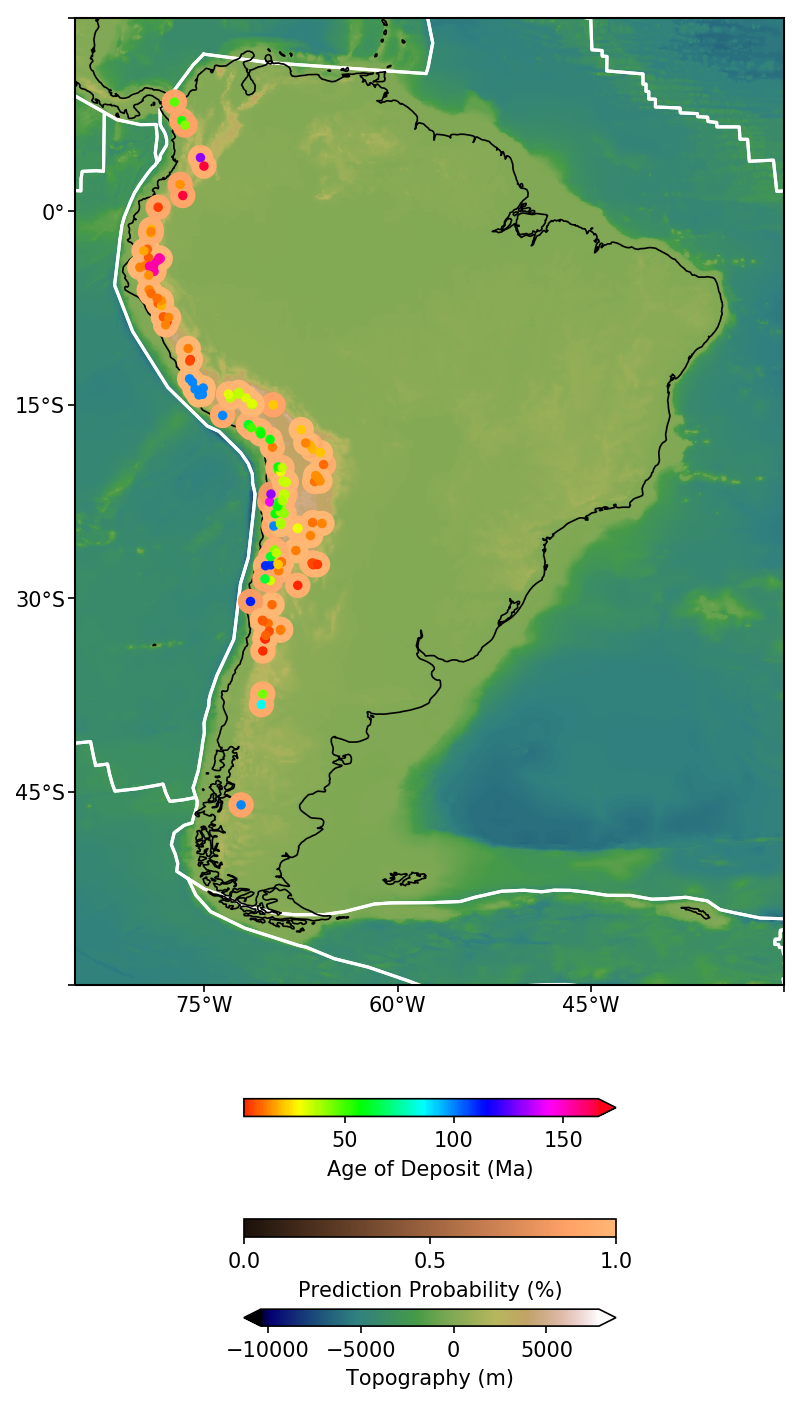

In [87]:
###Set up the figure
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-85, -30, -55, 10])
ax.coastlines('50m', linewidth=0.8)

###Add the map grid lines and format them
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='-')

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib import colorbar, colors

gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator([-75,-60, -45,-30])
gl.ylocator = mticker.FixedLocator([-60, -45, -30, -15, 0,15])
ax.set_xticks([-75,-60, -45,-30])
ax.set_xticklabels([''])
ax.set_yticks([-60, -45, -30, -15, 0,15])
ax.set_yticklabels([''])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'black', 'weight': 'normal'}

print("Made base map")

###Plot a topography underlay image
#Make a lat lon grid to fit the topo grid
lons, lats = np.meshgrid(topoX,topoY)
im1=ax.pcolormesh(lons,lats,topoZ, shading="flat",cmap=plt.cm.gist_earth,transform=ccrs.PlateCarree())              
cbar=plt.colorbar(im1, ax=ax, orientation="horizontal", pad=0.02, fraction=0.05, shrink=0.2,extend='both')
cbar.set_label('Topography (m)')

print("Added topo")

###Plot shapefile polygon outlines
#Load in plate polygons for plotting
topologyFile='../data/topology_platepolygons_0.00Ma.shp'
[recs,shapes,fields,Nshp]=readTopologyPlatepolygonFile(topologyFile)
for i, nshp in enumerate(range(Nshp)):
    if nshp!=35 and nshp!=36 and nshp!=23:
    #These are the plates that cross the dateline and cause 
        #banding errors
        polygonShape=shapes[nshp].points
        poly=np.array(polygonShape)
        xh=poly[:,0]
        yh=poly[:,1]
        ax.plot(xh, yh, c='w',zorder=1)

print("Added shapes")
        
###Plot the ore deposit probability
xh = ml_data_np[ml_data_np[:,-1]==1,0]
yh= ml_data_np[ml_data_np[:,-1]==1,1]
l2 = ax.scatter(xh, yh, 500, marker='.',c=pRF[:147,1],cmap=plt.cm.copper,zorder=3,transform=ccrs.PlateCarree(),vmin=0,vmax=1)
#l2 = pmap.scatter(xh, yh, 20, marker='.',edgecolor='dimgrey',linewidth=0.5,c=pRF[:147,1],cmap=plt.cm.copper,zorder=3)
cbar=fig.colorbar(l2, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05, shrink=0.2,ticks=[0,0.5,1.0])
cbar.set_clim(-0.1, 1.1)
cbar.set_label('Prediction Probability (%)')

###Plot the ore deposit Age
xh=ml_data_np[ml_data_np[:,-1]==1,0]
yh = ml_data_np[ml_data_np[:,-1]==1,1]
l2 = ax.scatter(xh, yh, 50, marker='.',c=ml_data_np[ml_data_np[:,-1]==1,4],cmap=plt.cm.hsv,zorder=3)
cbar=fig.colorbar(l2, ax=ax, orientation="horizontal", pad=0.1, fraction=0.05, shrink=0.2,extend='max',ticks=[0,50,100,150])
cbar.set_clim(0, 170)
cbar.set_label('Age of Deposit (Ma)')

print("Added deposit probability")

plt.show()

# Exercise
Do the same analysis but using a different Machine Learning algorith for your classification. You can use this as a guide for picking a good classification algorithm https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. 
Additionaly, determine which parameters are best for learning. For robust results ***learn*** which parameters are most important! 
Present your results on a map, and compare it with the Random Forrest method. Explain why the parameters you have chosen are probably the most important. Explain why there are differences in the ML algorithms.

# Datasets